In [25]:
import pandas as pd 
import numpy as np
from IPython.display import display_html
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
import warnings  
warnings.filterwarnings('ignore')

In [26]:
synchron_df  = pd.read_csv('.\Datasets\SynchronousMachine.csv' )
synchron_df.columns = ['Laststrom' , ' Leistungsfaktor' , 'Leistungsfaktor_f' , 'Erregerstrom_A' , 'Erregerstrom']
display_html(synchron_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Laststrom,557.0,4.499820,0.896024,3.000,3.700,4.500,5.300,6.000
Leistungsfaktor,557.0,0.825296,0.103925,0.650,0.740,0.820,0.920,1.000
Leistungsfaktor_f,557.0,0.174704,0.103925,0.000,0.080,0.180,0.260,0.350
Erregerstrom_A,557.0,0.350659,0.180566,0.037,0.189,0.345,0.486,0.769
Erregerstrom,557.0,1.530659,0.180566,1.217,1.369,1.525,1.666,1.949


<p><br><b>Data Cleaning</b></br></p>

In [27]:
# Checking for duplicated Values
synchron_df.duplicated().sum()

#checking for missung Values 
synchron_df.isnull().sum()

Laststrom            0
 Leistungsfaktor     0
Leistungsfaktor_f    0
Erregerstrom_A       0
Erregerstrom         0
dtype: int64

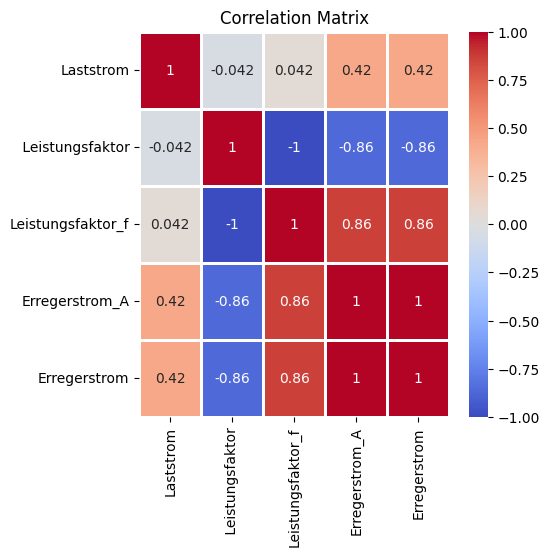

In [35]:
corr_df = synchron_df.corr(method='pearson')
plt.figure(figsize=(5 ,5))
sns.heatmap(corr_df , cmap='coolwarm' , linewidths=1 , annot = True)
plt.title('Correlation Matrix')
plt.show()

<p> Laut der Korrelationsmatrix :  <br>
      -  Der Laststrom korreliert mit dem Erregerstrom , der Anderüng des Erregerstromes  gut(42%)  --> vorwiegend Positiv  <br>
      -  Die Korrelation zwischen der Leistungsfaktor und die anderen Parameter ist durchaus negativ <br>
      -  Die Korrelation zwischen dem Fehler des Leistungsfaktor , Änderung des erregerstromes und den anderen Parameter sind durchaus gut <br>
</p>
      

In [38]:
# Aufteilen des Datasets 
features = synchron_df.loc[: , :'Erregerstrom_A']
label = synchron_df.loc[: , 'Erregerstrom']


<p><b>Trainieren des Modell  und Evaluation</b></p>

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_train , x_test , y_train , y_test = train_test_split(features , label , test_size=0.25)
model = LinearRegression()
model.fit(x_train,y_train)

preds  = model.predict(x_test)

# evaluation des modells
score = r2_score(y_test , preds)
print(score)

1.0
